<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Project Exercise

This notebook was prepared by the instructor of the course and I made annotations on it.

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

## Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The `loan_status` column contains our label/target, which can be:
- `fully paid`
- `charged off`: bad debt that is going to be problematic to cancel

## Data Overview

There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [9]:
import pandas as pd

In [10]:
# For very large datasets with many variables
# It is a good idea to have a separate dictionary with meta-information
# on the variables
data_info = pd.read_csv('../data/lending_club_info.csv',index_col='LoanStatNew')

In [11]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [12]:
# We can define extra functions to access the meta information
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [13]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [15]:
df = pd.read_csv('../data/lending_club_loan_two.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Section 1: Exploratory Data Analysis

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [17]:
# Specially for classification problems
# Countplots are important: we check whether our dataset is balanced or not
# In this case, it's inbalanced - common for fraud detection

<AxesSubplot:xlabel='loan_status', ylabel='count'>

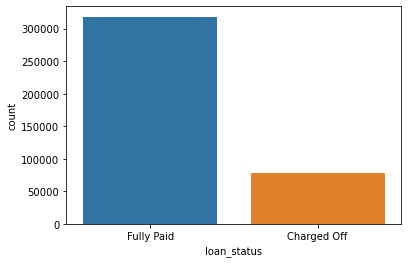

In [21]:
sns.countplot(x='loan_status',data=df)

**TASK: Create a histogram of the loan_amnt column.**

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

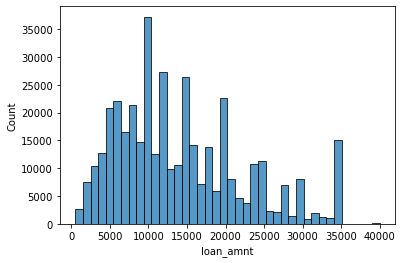

In [22]:
sns.histplot(x='loan_amnt',data=df,bins=40,kde=False)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

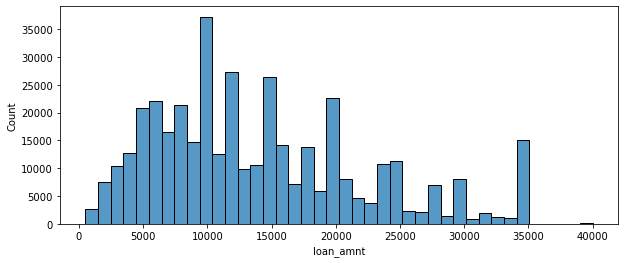

In [23]:
# Improve figure size
# Notice salient things - for instance, here: the spikes
# Spikes are probably standard loan amounts?
plt.figure(figsize=(10,4))
sns.histplot(x='loan_amnt',data=df,bins=40,kde=False)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [24]:
# Always explore the correlation of continuous variables!
# And visualize them with heatmaps!
# Plus: notice salient infos; in this case:
# - most variables are not correlated
# - some variables seem to be quite correlated; eg: installment & loan_amnt

In [25]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

In [26]:
# Visualize correlations with a heatmap and look at salient infos

<AxesSubplot:>

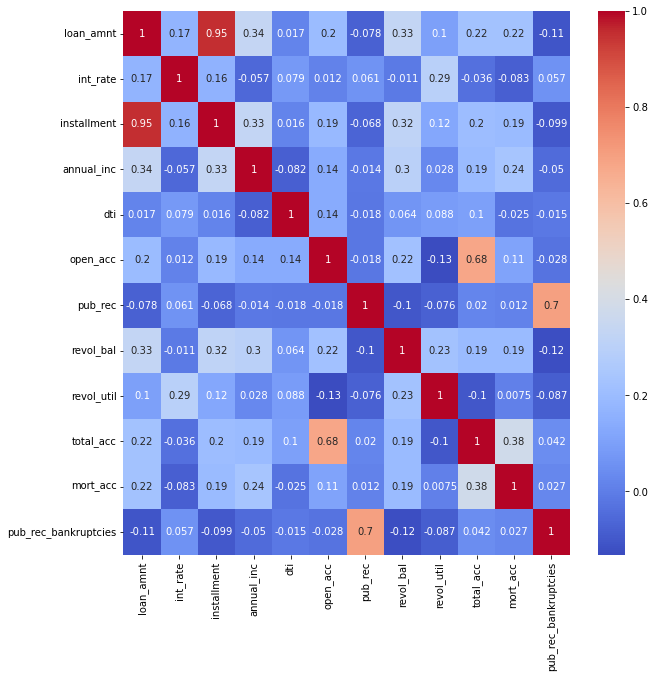

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [28]:
# Explore remarkable data, for instance features that are very correlated

In [29]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [30]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

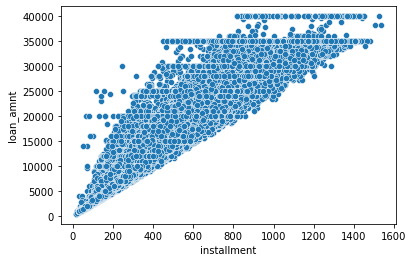

In [31]:
# Always scatterplots of highly correlated variables to see what is happening
# In this case, we see that the monthly payment is related to the borrowed money
sns.scatterplot(x='installment',y='loan_amnt',data=df)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [32]:
# Does the amount clearly predict the target variable?
# If classification, always do box plots with suspects!
# Higher loans tend to be linked to more bad loans

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

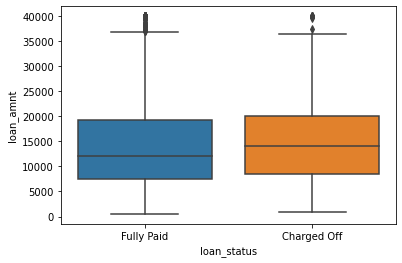

In [33]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [34]:
# We can get the box plot descriptives using groupby!

In [35]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [36]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [37]:
# Subgrades contain the grade
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

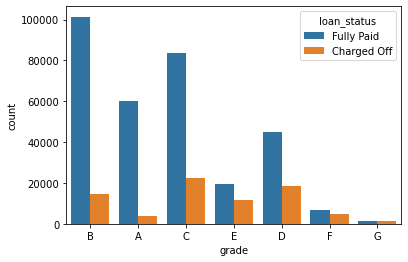

In [38]:
sns.countplot(x='grade',hue='loan_status',data=df)

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [39]:
# Countplot of subgrades
# Grades are unordered -> we order them with sort()!

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

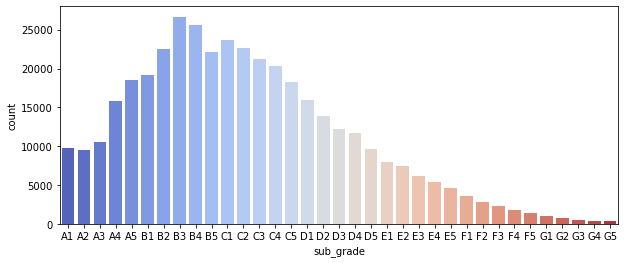

In [40]:
plt.figure(figsize=(10,4))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=sub_grade_order,palette='coolwarm')

In [41]:
# We plot the same, but with hue = target
# Fully paid loans peak at subgrade B2/3
# Bad loans peak at C3/4

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

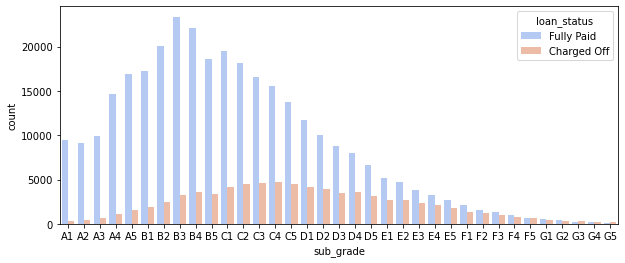

In [42]:
plt.figure(figsize=(10,4))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',
              hue='loan_status',
              data=df,
              order=sub_grade_order,
              palette='coolwarm')

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [43]:
# If there are wide-spread categorical segments
# for which no target outcome distiction seems possible to be made
# analyze them carefully!

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

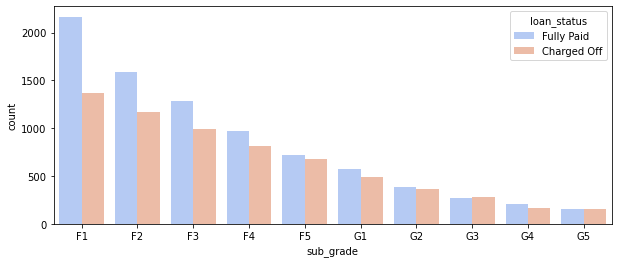

In [44]:
# Filter: df[(df['grade'] == 'F') | (df['grade'] == 'G')]
# We see that for really bad grades, the likelyhood of being paid/not is close to 50/50
plt.figure(figsize=(10,4))
sub_grade_order = sorted(df[(df['grade'] == 'F') | (df['grade'] == 'G')]['sub_grade'].unique())
sns.countplot(x='sub_grade',
              hue='loan_status',
              data=df[(df['grade'] == 'F') | (df['grade'] == 'G')],
              order=sub_grade_order,
              palette='coolwarm')

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [45]:
# It is common to replace strings by numeric variables
# We create anew column/variable to be backward compatible

In [46]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [47]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [48]:
# After converting the target categories to numbers
# We can check the correlations of the numerical values with the target!
# Drop the target variable from the diagram
# Interest rate seems to ve quite important:
# the lower, the better changce of being repaid

<AxesSubplot:>

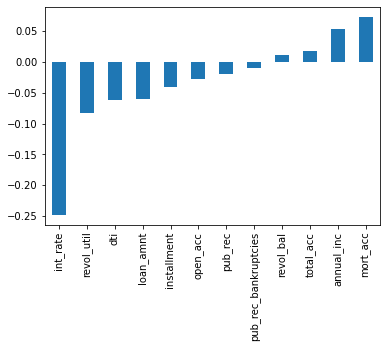

In [49]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [50]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [51]:
np.sum(df.isna())

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [52]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [53]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [54]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [55]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [56]:
df['emp_title'].nunique()

173105

In [57]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [58]:
# We could group job types
# But it's too much work...
# So we remove the column/feature

In [59]:
df.drop('emp_title',axis=1,inplace=True)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [60]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [61]:
emp_length_order = ['< 1 year',
                    '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                    '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

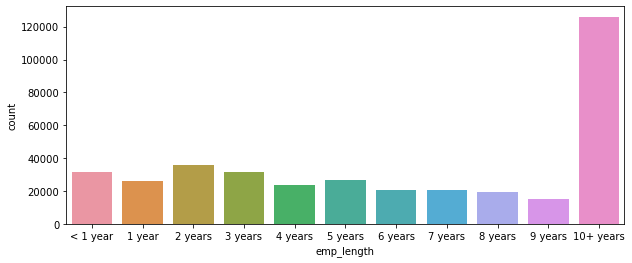

In [62]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

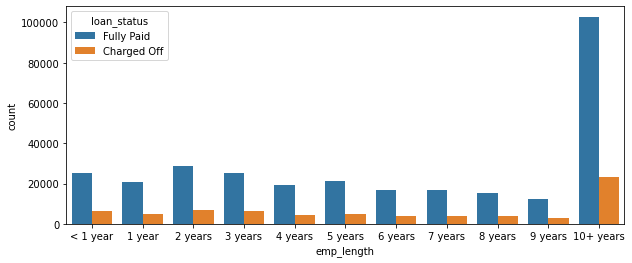

In [63]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,hue='loan_status',order=emp_length_order)

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [64]:
s1 = df[df['loan_status']=='Fully Paid']['emp_length'].value_counts()

In [65]:
s2 = df[df['loan_status']=='Charged Off']['emp_length'].value_counts()

In [66]:
s = s2/s1

In [67]:
s

1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: emp_length, dtype: float64

<AxesSubplot:>

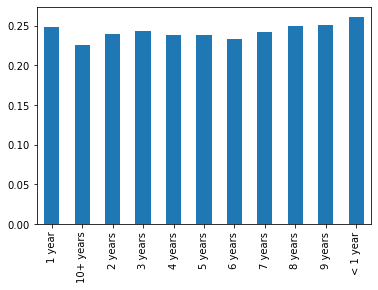

In [68]:
# There seems to be no effect of the emp_length on the loan_status
s.plot(kind='bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [69]:
df.drop('emp_length',axis=1,inplace=True)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [70]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [71]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [72]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [73]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [74]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [75]:
# We remove 'title', because it's a concrete description of 'purpose'

In [76]:
df.drop('title',axis=1,inplace=True)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [77]:
feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [78]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

<AxesSubplot:>

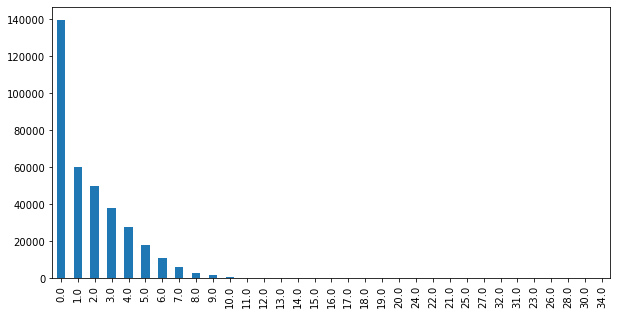

In [79]:
plt.figure(figsize=(10,5))
df['mort_acc'].value_counts().plot(kind='bar')

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [80]:
# How can we fill in missing cells? Many possibilities:
# - Linear model based on other columns
# - Fill in with mean
# - Fill in with the mean of a group the cell belongs to

In [81]:
# Which are the most correlated columns?
# Can we get information from them to fill in the missing cells?
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [82]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [83]:
df['total_acc'].nunique()

118

In [84]:
# The values 'total_acc' & 'mort_acc' are related
# There are no missing cells for 'total_acc'
# And there are a max of 118 possible values
# We group data in 'total_acc' and compute the mean('mort_acc') of each of teh 118 groups
# We use that as look-up table to fill in missing 'mort_acc' values: 
# 'total_acc' -> 'mort_acc'

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [85]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [86]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [87]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [88]:
# Check now again missing values
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [89]:
# Once we have less than 0.5% of datapoints with missing values
# We can remove the points with the missing values

In [90]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [91]:
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [93]:
# Very useful way of getting column names of categorical data
# Other types:
# 'object': strings
# 'number'
# 'datetime'
# 'bool'
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [94]:
# We need to convert each of the categorical variables in continuous or dummy variables
# In order to feed them to the neural network!

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [95]:
# We could convert term to one dummy variable 1/0
# But since it has the duration meaning, we convert it to continuous
# whereby only values 36 & 60 are possible
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [96]:
# Create a look-up dictionary
# Be careful with the eventual spaces of the strings... (eg, pre & post string)
term_dict = {' 36 months':36,' 60 months':60}

In [97]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [98]:
# Two Options: apply() or map()
df['term'].apply(lambda x: term_dict[x])
df['term'].map(term_dict)

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [99]:
df['term'] = df['term'].map(term_dict)

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [100]:
# Remove anything redundant
df.drop('grade',axis=1,inplace=True)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [101]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [102]:
dummy_subgrade = pd.get_dummies(df['sub_grade'],drop_first=True)

In [103]:
dummy_subgrade.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df = pd.concat([df,dummy_subgrade],axis=1)

In [105]:
# Remove old sub_grade
df.drop('sub_grade',axis=1,inplace=True)

In [106]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [107]:
dummy_var = pd.get_dummies(df['verification_status'],drop_first=True)
df = pd.concat([df.drop('verification_status',axis=1),dummy_var],axis=1)

In [108]:
dummy_var = pd.get_dummies(df['application_type'],drop_first=True)
df = pd.concat([df.drop('application_type',axis=1),dummy_var],axis=1)

In [109]:
dummy_var = pd.get_dummies(df['initial_list_status'],drop_first=True)
df = pd.concat([df.drop('initial_list_status',axis=1),dummy_var],axis=1)

In [110]:
dummy_var = pd.get_dummies(df['purpose'],drop_first=True)
df = pd.concat([df.drop('purpose',axis=1),dummy_var],axis=1)

In [111]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [112]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [113]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [114]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [115]:
dummy_var = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummy_var],axis=1)

In [116]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [117]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [118]:
df['address'].iloc[0][-5:]

'22690'

In [119]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [120]:
df['zip_code'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [121]:
# We have only 10 zip codes - wierd...
# But we can use dummy variables with only 10 values
df['zip_code'].nunique()

10

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [122]:
dummy_var = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),dummy_var],axis=1)

In [123]:
df.drop('address',axis=1,inplace=True)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [124]:
feat_info('issue_d')

The month which the loan was funded


In [125]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64

In [126]:
# We need to remove that, because we won't have a date when getting a new data!
df.drop('issue_d',inplace=True,axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [127]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [128]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [129]:
# We could just take the year, or the whole date as date format
# Or better, an integer with year + month
# This way, we have a continuous value, not a categorical / dummy variable
months = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,
         'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df['earliest_cr'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:])*100 + months[date[-8:-5]])

In [130]:
df['earliest_cr']

0         199006
1         200407
2         200708
3         200609
4         199903
           ...  
396025    200411
396026    200602
396027    199703
396028    199011
396029    199809
Name: earliest_cr, Length: 395219, dtype: int64

In [131]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [132]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [133]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [134]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,199006
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,200407
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,200708
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,200609
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,199903


In [135]:
X = df.drop(['loan_status','loan_repaid'],axis=1)
y = df['loan_repaid']

**TASK: Set X and y variables to the .values of the features and label.**

In [136]:
X = X.values

In [137]:
y = y.values

In [138]:
X.shape

(395219, 78)

In [139]:
y.shape

(395219,)

### OPTIONAL: Grabbing a Sample for Training Time
Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

In [140]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler = MinMaxScaler()

In [144]:
X_train = scaler.fit_transform(X_train)

In [145]:
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [146]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [147]:
# See architecture design notes in notebook 19_03

# CODE HERE
model = Sequential()

# Decrease the number of neurons in each layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5)) # probability of each neuron to drop: 0.5
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.5)) # probability of each neuron to drop: 0.5
model.add(Dense(19,activation='relu'))
# Binary classification: we need the sigmoid to map the values to [0,1]
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [148]:
# Early stopping when validation loss stops decreasing
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [149]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),
         callbacks=[early_stop])

2021-11-07 12:04:13.604292: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-07 12:04:13.605275: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 10s 33us/sample - loss: 0.3194 - val_loss: 0.2669
Epoch 2/25
316175/316175 [==============================] - 9s 30us/sample - loss: 0.2678 - val_loss: 0.2641
Epoch 3/25
316175/316175 [==============================] - 9s 30us/sample - loss: 0.2644 - val_loss: 0.2633
Epoch 4/25
316175/316175 [==============================] - 10s 30us/sample - loss: 0.2629 - val_loss: 0.2633
Epoch 5/25
316175/316175 [==============================] - 9s 30us/sample - loss: 0.2621 - val_loss: 0.2627
Epoch 6/25
316175/316175 [==============================] - 9s 30us/sample - loss: 0.2616 - val_loss: 0.2627
Epoch 7/25
316175/316175 [==============================] - 9s 30us/sample - loss: 0.2611 - val_loss: 0.2630
Epoch 8/25
316175/316175 [==============================] - 9s 30us/sample - loss: 0.2609 - val_loss: 0.2627
Epoch 9/25
316175/316175 [==============================] - 9s 30us/sample 

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [150]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

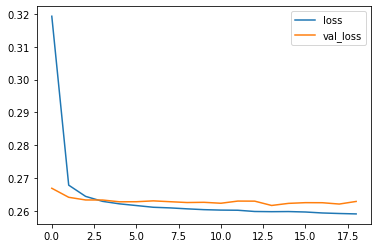

In [151]:
losses.plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [152]:
prediction = (model.predict(X_test) > 0.5).astype("int32")

In [153]:
from sklearn.metrics import classification_report,confusion_matrix

In [154]:
print(confusion_matrix(y_test,prediction))

[[ 6720  8938]
 [    0 63386]]


In [155]:
# The results are shit
# We have an inbalanced dataset: 80% are fully paid
# Thus, a dumb model which says 'fully paid' always is 80% accurate
# Therefore, the result is bad
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



**TASK: Given the customer below, would you offer this person a loan?**

In [156]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop(['loan_repaid','loan_status'],axis=1).iloc[random_ind]
new_customer

loan_amnt       25000.00
term               60.00
int_rate           18.24
installment       638.11
annual_inc      61665.00
                 ...    
48052               0.00
70466               0.00
86630               0.00
93700               0.00
earliest_cr    199602.00
Name: 305323, Length: 78, dtype: float64

In [157]:
# Scale!
# And reshape
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [158]:
prediction = (model.predict(new_customer) > 0.5).astype("int32")

In [159]:
prediction

array([[1]], dtype=int32)

**TASK: Now check, did this person actually end up paying back their loan?**

In [160]:
df.loc[random_ind,'loan_status']

'Fully Paid'

# GREAT JOB!